In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [5]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [6]:
gender=pd.get_dummies(df['sex'])

In [7]:
df=pd.concat([df,gender],axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,Female
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [9]:
df.drop('Male',axis=1,inplace=True)

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Female
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [12]:
df.rename(columns={'Female':'Gender'},inplace=True)

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Gender
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [18]:
grouped=pd.DataFrame(df.groupby(['sex','day'])['total_bill'].mean())

In [21]:
grouped.reset_index().to_excel('D:male_preference.xlsx')

In [22]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'Gender'], dtype='object')

In [27]:
group_total=df.groupby(['day','time'])[['tip','total_bill']].agg(['min','max','mean'])

In [28]:
group_total

tip                  total_bill                  
              min    max      mean        min    max       mean
day  time                                                      
Thur Lunch   1.25   6.70  2.767705       7.51  43.11  17.664754
     Dinner  3.00   3.00  3.000000      18.78  18.78  18.780000
Fri  Lunch   1.58   3.48  2.382857       8.58  16.27  12.845714
     Dinner  1.00   4.73  2.940000       5.75  40.17  19.663333
Sat  Lunch    NaN    NaN       NaN        NaN    NaN        NaN
     Dinner  1.00  10.00  2.993103       3.07  50.81  20.441379
Sun  Lunch    NaN    NaN       NaN        NaN    NaN        NaN
     Dinner  1.01   6.50  3.255132       7.25  48.17  21.410000

In [35]:
group_total.dropna(axis=0).reset_index()

day    time   tip                  total_bill                  
                  min    max      mean        min    max       mean
0  Thur   Lunch  1.25   6.70  2.767705       7.51  43.11  17.664754
1  Thur  Dinner  3.00   3.00  3.000000      18.78  18.78  18.780000
2   Fri   Lunch  1.58   3.48  2.382857       8.58  16.27  12.845714
3   Fri  Dinner  1.00   4.73  2.940000       5.75  40.17  19.663333
4   Sat  Dinner  1.00  10.00  2.993103       3.07  50.81  20.441379
5   Sun  Dinner  1.01   6.50  3.255132       7.25  48.17  21.410000

In [34]:
group_total.dropna(inplace=True)

In [40]:
df.corr()

,total_bill,tip,size,Gender
total_bill,1.000000,0.675734,0.598315,-0.144877
tip,0.675734,1.000000,0.489299,-0.088862
size,0.598315,0.489299,1.000000,-0.086195
Gender,-0.144877,-0.088862,-0.086195,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

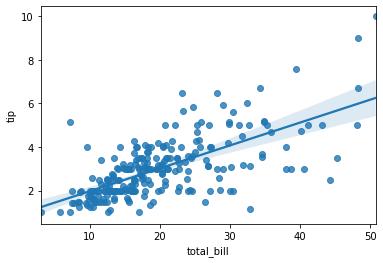

In [37]:
sns.regplot(x='total_bill',y='tip',data=df)

In [41]:
from scipy import stats

In [42]:
stats.pearsonr(df['total_bill'],df['tip'])

(0.6757341092113645, 6.692470646863477e-34)

In [43]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Gender
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [44]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [46]:
lead=pd.DataFrame({'Leader':['ahmed','richard','maryam','omar'],'day':['Sun', 'Sat', 'Thur', 'Fri']})

In [47]:
lead

,Leader,day
0,ahmed,Sun
1,richard,Sat
2,maryam,Thur
3,omar,Fri


In [48]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,Gender
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0


In [50]:
df=pd.merge(df,lead)

In [56]:
df.groupby(['Leader','day'])['tip'].sum().sort_values(ascending=False)

Leader   day 
richard  Sat     260.40
ahmed    Sun     247.39
maryam   Thur    171.83
omar     Fri      51.96
Name: tip, dtype: float64

In [ ]:
cars
corr()